<a href="https://colab.research.google.com/github/cakshay2013/Convex-Optimization-Problems-and-Solutions/blob/main/Crane_mimimum_time_maneuver_problem_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimum k:
 35


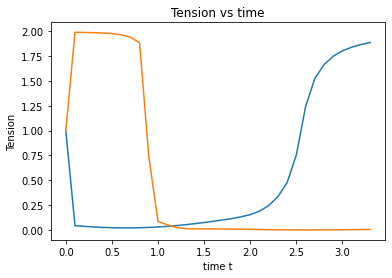

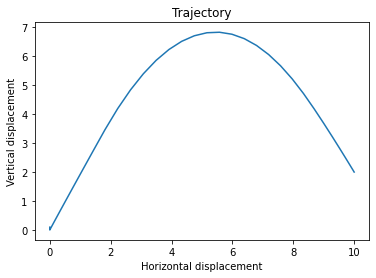

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
 
u = 100
l = 10
k = int(10)
 
#The objective fcn is quasi convex. Thus, using bisection algorithm
 
while (l+1!=u):
 
  k=int(np.floor((l+u)/2))
  T = cp.Variable((2, k-1))
  theta = np.array([[-1*np.sin(15*np.pi/180), np.sin(15*np.pi/180)], [np.cos(15*np.pi/180), np.cos(15*np.pi/180)]])
  mg = np.array([0, -0.98])
  mg = np.tile(mg,(int(k-1),1))
  F = theta*T + mg.T
  p = cp.Variable((2, k))
  v = cp.Variable((2, k))
 
  objective = cp.Minimize(0)
  constraints = [T>=0, T<=2, p[:,1] == np.array([0,0]), p[:,-1] == np.array([10,2]), v[:,1] == np.array([0,0]), v[:,-1] == np.array([0,0])]
  constraints += [v[:,1:k] == v[:,0:k-1] + F, p[:,1:k] == p[:,0:k-1] + 0.1*v[:,0:k-1]]
 
  prob = cp.Problem(objective, constraints)
  prob.solve()
 
  if prob.status == 'optimal':
    u = k
    kopt = k
  else:
    l = k
 
print("Optimum k:\n", kopt)
 
time = np.empty(k-1)
time[0] = 0
 
for i in range(0,k-2):
  time[i+1] = time[i] + 1.0
 
plt.figure()
plt.plot(0.1*time,T.value[0,:])
plt.plot(0.1*time,T.value[1,:])
plt.xlabel('time t')
plt.ylabel('Tension') 
plt.title('Tension vs time')
plt.show()
 
plt.figure()
plt.plot(p.value[0,:],p.value[1,:])
plt.xlabel('Horizontal displacement') 
plt.ylabel('Vertical displacement') 
plt.title('Trajectory')
plt.show()
 
#Trajectory is not linear